In [1]:
from mmpose.apis import MMPoseInferencer
import cv2
from matplotlib import pyplot as plt

# instantiate the inferencer using the model alias
inferencer = MMPoseInferencer('hand')

# The MMPoseInferencer API employs a lazy inference approach,
# creating a prediction generator when given input
img_path = 'images_of_gestures/A.jpg'
img = cv2.imread(img_path)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-hand5_pt-aic-coco_210e-256x256-74fb594_20230320.pth
04/02 16:08:41 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_nano_8xb32-300e_hand-267f9c8f.pth
04/02 16:08:42 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope,

/home/roger/Documents/2-Upwork/gesture/shrine-exp/transcribe-asl/venv/lib/python3.10/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/onehand10k.py" does not exist. A matched config file "/home/roger/Documents/2-Upwork/gesture/shrine-exp/transcribe-asl/venv/lib/python3.10/site-packages/mmpose/.mim/configs/_base_/datasets/onehand10k.py" will be used instead.
  warnings.warn(
/home/roger/Documents/2-Upwork/gesture/shrine-exp/transcribe-asl/venv/lib/python3.10/site-packages/mmdet/apis/det_inferencer.py:154: UserWarning: palette does not exist, random is used by default. You can also set the palette to customize.
  warnings.warn(


In [2]:
result_generator = inferencer(img)
result = next(result_generator)

/home/roger/Documents/2-Upwork/gesture/shrine-exp/transcribe-asl/venv/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
result['predictions'][0][0]['keypoints']

[[481.69647216796875, 689.9685668945312],
 [584.9451293945312, 637.5247802734375],
 [665.2496948242188, 535.9149780273438],
 [699.6658935546875, 449.8744201660156],
 [726.7072143554688, 370.38934326171875],
 [640.6666870117188, 457.24932861328125],
 [643.1249389648438, 359.7366943359375],
 [643.1249389648438, 444.1383972167969],
 [639.8472290039062, 483.4712219238281],
 [569.3759155273438, 453.15216064453125],
 [579.2091064453125, 378.58367919921875],
 [580.028564453125, 482.65179443359375],
 [570.1953125, 507.23480224609375],
 [498.08514404296875, 444.1383972167969],
 [509.5572204589844, 401.52783203125],
 [515.2932739257812, 507.23480224609375],
 [514.4738159179688, 526.9012451171875],
 [420.2389221191406, 467.9019775390625],
 [446.4608154296875, 425.2914123535156],
 [457.9328918457031, 508.8736877441406],
 [454.6551513671875, 519.5263061523438]]

In [8]:
def draw_hand_from_kps(img, kps):
    """
    Draw hand keypoints on the given image.

    Parameters:
        img (ndarray): The input image.
        kps (list): List of hand keypoints.

    Returns:
        ndarray: The image with hand keypoints drawn.

    Keypoints Format:
        Each keypoint is represented as a tuple (x, y), where x and y are the coordinates of the keypoint.

    Hand Connections:
        The hand connections define the order in which keypoints are connected to form the hand skeleton.
        The connections are defined as a list of lists, where each inner list represents a connection between keypoints.
        For example, [0, 1, 2, 3, 4] represents a connection between keypoints 0 and 1, 1 and 2, 2 and 3, and 3 and 4.

    Example:
        img = cv2.imread('image.jpg')
        kps = [(100, 200), (150, 250), ...]
        img_with_keypoints = draw_hand_from_kps(img, kps)
    """
    hand_connections = [
        [0, 1, 2, 3, 4],
        [0, 5, 6, 7, 8],
        [0, 9, 10, 11, 12],
        [0, 13, 14, 15, 16],
        [0, 17, 18, 19, 20],
    ]
    for kp in kps:
        x, y = kp
        cv2.circle(img, (int(x), int(y)), 5, (255, 0, 0), -1)
    for connections in hand_connections:
        for i in range(len(connections) - 1):
            x1, y1 = kps[connections[i]]
            x2, y2 = kps[connections[i + 1]]
            cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    return img

In [9]:
img_n = draw_hand_from_kps(img, result['predictions'][0][0]['keypoints'])

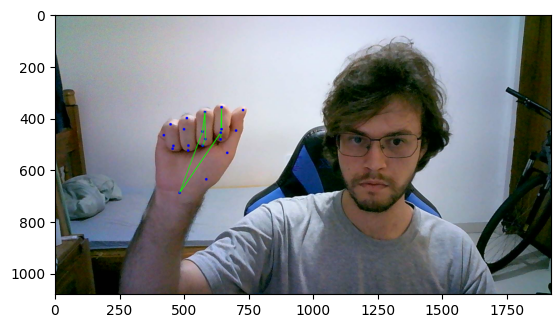

In [10]:
plt.imshow(img_n[:,:,::-1])